# 14 - Least Squares
- 14.1 Introduction
- 14.2 5 Steps of Model-Fitting
- 14.3 Terminology
- 14.4 Least-squares via left inverse
- 14.5 Least-squares via projection
- 14.6 Least-squares via row-reduction
- 14.7 Predictions and residuals
- 14.8 Least-squares example
- 14.9 Coding challenges
- 14.10 Code solutions

Notes, code snippets, and the end of chapter exercises from the book _Linear Algebra: Theory, Intuition, Code_ by Mike X Cohen. 

Find more information about the book on [github](https://github.com/mikexcohen/LinAlgBook) and [amazon](https://www.amazon.com/Linear-Algebra-Theory-Intuition-Code/dp/9083136604).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 14.1 Introduction
Linear least squares is the most commonly used method to fit data to a model (see _Terminology_).

### Terminology
- Model: Simplified low-dimensional representation of the system that helps with understanding or simulation.
- Fixed features: Components of the model imposed by the modeler. Example: Choice of attributes used in the model.
- Free parameters: Components of the model which are adjusted to allow the model to fit any dataset.

## 14.2 5 Steps of Model-Fitting
Solving a linear least squares problem is equivalent to solving the overdetermined linear system of equations $Ax = b$ with some terminology differences.

Replace $A x = b$ with $X \beta = y$.
- $X$ is a tall matrix of coefficients holding the values of each feature.
- $\beta$ are the parameters of the model.
- $y$ is a column vector of data which are fit by the model.

Fitting the model refers to solving $X \beta = y$ for $\beta$.

Evaluating the model uses inferential statistics to determine whether the model is a good fit for the data.
- Use p-values (_random distribution_) and t-values (_normal distribution_) to test hypothesis about the distribution of data.

## 14.3 Terminology
_Linear_ in linear least squares refers to the way in which the variables $X$ are scalar-multiplied by the parameters $\beta$.

### Linear Least Squares vs. Linear Regression
Linear regression assumes a linear relationship between the independent and dependent variables, but doesn't prescribe how model is fit.
- Linear least squares is one choice of estimation method for fitting a linear regression model.

## 14.4 Least-squares via left inverse
Solution to $X \beta = y$ exists only when $y$ is in the column space of $y \in C(X)$.

Due to noise in the measurements $y \notin C(X)$ is the most common case, so we explicitly add a noise term $\epsilon$ to the model so that $y + \epsilon \in C(X)$.

$$
y = X \beta + \epsilon
$$

Notes
- The residual $\epsilon = y - X \beta$ is in the left nullspace $\epsilon \in N(X^T)$ and orthogonal to the column space $\epsilon \perp C(X)$.

## 14.5 Least-squares via projection
The normal equation represents the orthogonal projection of the column space of the features $X$ with the residual $\epsilon = y - X \beta$.

$$
\begin{align}
X^T \epsilon &= 0 \\
X^T (y - X \beta) &= 0 \\
X^T y &= X^T X \beta \\
\end{align}
$$

From this we can derive the solution to the linear least squares equation $y = X \beta$ for $\beta$ as the left inverse.

$$
\beta = (X^T X)^{-1} X^T y
$$

Notes
- The product $X^T \epsilon = 0$ as an orthogonal projection should be familiar from section 13.2 Projections in $\mathbb{R}^N$.

## 14.6 Least-squares via row-reduction

### Solution To Normal Equation via RREF
Solution $\beta$ can be obtained from the normal equation $X^T X \beta = X^T y$ using RREF.

1. Augment $X$ and $y$ to the normal equation $[X^T X| X^T y]$.
2. Use elementary row operations to transform $\text{RREF}([X^T X| X^T y]) = [I | \beta]$.

Notes
- Even though $X$ is tall matrix, the product $X^T X$ will be a square matrix that spans all of $\mathbb{R}^N$ and the product $X^T y \in \mathbb{R}^N$.

## 14.7 Predictions and residuals
Use calculus to derive the left inverse, by reframing the model fitting as finding the parameters $\beta$ that minimize the sum of squared residuals.

$$
\text{min}_\beta || y - X \beta ||^2
$$

Use calculus to find the minimum by setting the derivative to 0 and solving for $\beta$.

$$
\begin{align}
\frac{d}{d\beta} || y - X \beta ||^2 &= 0 \\
2 X^T (y - X \beta) &= 0 \\
X^T y - X^T X \beta &= 0 \\
X^T y &= X^T X \beta \\
\beta &= (X^T X)^{-1} X^T y \\
\end{align}
$$

## 14.8 Least-squares example

Examples below demonstrate least squares fit using different independent variables.

### Example 1: Fit an array of constant values to response y.
- Model that predicts the mean value of y for any value of x.

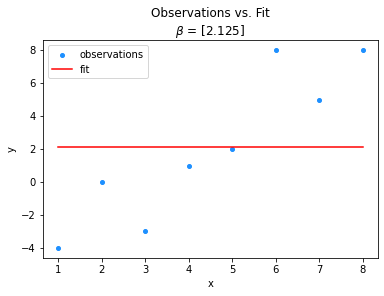

In [2]:
# Fit an array of constant values to response y.
# Results in model that predicts np.mean(y) for any value of x.
y = np.array([-4,0,-3,1,2,8,5,8], dtype=float)
X = np.ones(y.size).reshape(-1,1)

beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

fitx = np.array([1,2,3,4,5,6,7,8], dtype=float).reshape(-1,1)
fity = np.repeat(beta, fitx.size)

# Plot the fitted model against observations.
plt.scatter(fitx, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title(f'Observations vs. Fit\n$\\beta$ = {np.array2string(beta)}')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc=0)  # Upper left corner.
plt.show()

np.testing.assert_equal(beta, np.mean(y))

### Example 2: Fit an array of monotonic indices to response y.
- Model with constant slope and 0 intercept.

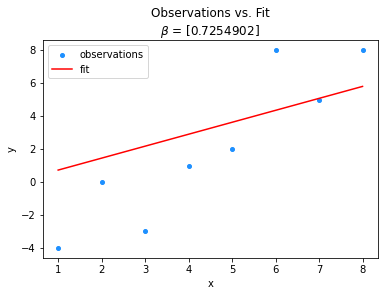

In [3]:
# Fit an array of monotonic indices to response y.
# Results in model with constant slope and 0 intercept.
y = np.array([-4,0,-3,1,2,8,5,8], dtype=float)
X = np.array([1,2,3,4,5,6,7,8], dtype=float).reshape(-1,1)

beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

fity = X @ beta

# Plot the fitted model against observations.
plt.scatter(X, y, s=16, c='dodgerblue', label='observations')
plt.plot(X, fity, c='red', label='fit')
plt.title(f'Observations vs. Fit\n$\\beta$ = {np.array2string(beta)}')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc=0)  # Upper left corner.
plt.show()

### Example 3: Fit matrix with [1|indices] to response y.
- Model with constant slope and non-zero intercept.

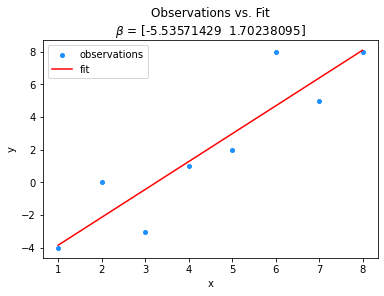

In [4]:
# Fit matrix with [1|indices] to response y.
# Results in model with constant slope and non-zero intercept.
y = np.array([-4,0,-3,1,2,8,5,8], dtype=float)
X = np.stack((np.ones(y.size), np.array([1,2,3,4,5,6,7,8], dtype=float)), axis=1)

beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

fity = X @ beta

# Plot the fitted model against observations.
plt.scatter(X[:,1], y, s=16, c='dodgerblue', label='observations')
plt.plot(X[:,1], fity, c='red', label='fit')
plt.title(f'Observations vs. Fit\n$\\beta$ = {np.array2string(beta)}')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc=0)  # Upper left corner.
plt.show()

# Verify that residual is perpindicular to X \beta.
epsilon = y - fity
np.testing.assert_almost_equal(np.dot(epsilon, X @ beta), 0)

## 14.9 Coding challenges